In [1]:
from itertools import combinations
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
# Define a function to get the data.
def get_data():
    return {
        '202301009_widening_model_683_mean200std305': [29.09, 31.17, 33.613, 46.63575, 87.1275, 64.257, 55.586, 43.41],
        '20230915_widening_model_970_mean200': [31.81, 44.9, 27.09, 28.4175, 35.23],
        'manual': [34.29, 25.157, 25.58, 20.42, 17.395, 14.757, 18.5975]
    }

In [3]:
# Define statistical functions.
def pairwise_mannwhitneyu(data):
    groups = list(data.keys())
    pairwise_results = {}
    comparisons = list(combinations(groups, 2))
    for group1, group2 in comparisons:
        stat, p = mannwhitneyu(data[group1], data[group2])
        pairwise_results[f'{group1} vs {group2}'] = (stat, p, p < 0.05)
    return pairwise_results

def calculate_effect_size(data, pairwise_results):
    effect_sizes = {}
    for comparison, (_, _, significant) in pairwise_results.items():
        if significant:
            group1, group2 = comparison.split(" vs ")
            median_diff = np.median(data[group1]) - np.median(data[group2])
            effect_sizes[comparison] = median_diff
    return effect_sizes


In [4]:
# Define helper functions for plotting.
def stars_from_p_value(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

In [5]:
def create_boxplot(data, pairwise_results):
    ordered_labels = [
        'manual',
        '20230915_widening_model_970_mean200',
        '202301009_widening_model_683_mean200std305'
    ]
    ordered_values = [data[key] for key in ordered_labels]
    colors = ['#FF9999', '#66B2FF', '#99FF99']
    effect_sizes = calculate_effect_size(data, pairwise_results)

    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    boxes = ax.boxplot(
        ordered_values,
        showmeans=True,
        whis=(0, 100),
        vert=True,
        patch_artist=True,
        labels=ordered_labels,
        medianprops=dict(linestyle='-', linewidth=2, color='magenta')
    )

    for patch, color in zip(boxes['boxes'], colors):
        patch.set_facecolor(color)

    y_max = max([max(val) for val in ordered_values])
    ax.set_ylim([0, y_max + 20])

    # Annotating significant differences and effect sizes
    case1 = '20230915_widening_model_970_mean200 vs manual'
    if pairwise_results[case1][2]:
        ax.annotate(stars_from_p_value(pairwise_results[case1][1]),
                    xy=(1.5, y_max + 2.2), ha='center', fontsize=15, color='black')
        plt.plot([1, 1, 2, 2], [y_max, y_max + 2, y_max + 2, y_max], lw=1.2, c='black')
        ax.annotate(f'Δ={effect_sizes[case1]:.2f}', xy=(1.5, y_max),
                    ha='center', fontsize=10,
                    color='black')

    case2 = '202301009_widening_model_683_mean200std305 vs manual'
    if pairwise_results[case2][2]:
        ax.annotate(stars_from_p_value(pairwise_results[case2][1]),
                    xy=(2.5, y_max + 6.2), ha='center', fontsize=15, color='black')
        plt.plot([1, 1, 3, 3], [y_max + 4, y_max + 6, y_max + 6, y_max + 4], lw=1.2, c='black')
        ax.annotate(f'Δ={effect_sizes[case2]:.2f}',
                    xy=(2.5, y_max + 4), ha='center', fontsize=10,
                    color='black')

    ax.annotate('Whiskers represent\nmin-max values',
                xy=(3, min(data["202301009_widening_model_683_mean200std305"]) - 2),
                xytext=(3, min(data["202301009_widening_model_683_mean200std305"]) - 10),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=9, ha='center')

    plt.title('Proofreading Speed Comparison, 653980 Sample')
    plt.ylabel('Speed (mm/hr)')
    plt.xlabel('Segmentation Version')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    legend_elements = [plt.Line2D([0], [0], color=color, lw=5, label=f'N={len(values)}')
                       for color, label, values in zip(colors, ordered_labels, ordered_values)]
    plt.legend(handles=legend_elements, loc='upper left')

    plt.tight_layout()
    plt.show()

{'202301009_widening_model_683_mean200std305 vs 20230915_widening_model_970_mean200': (31.0, 0.12742812742812742, False), '202301009_widening_model_683_mean200std305 vs manual': (53.0, 0.0021756021756021756, True), '20230915_widening_model_970_mean200 vs manual': (32.0, 0.01767676767676768, True)}


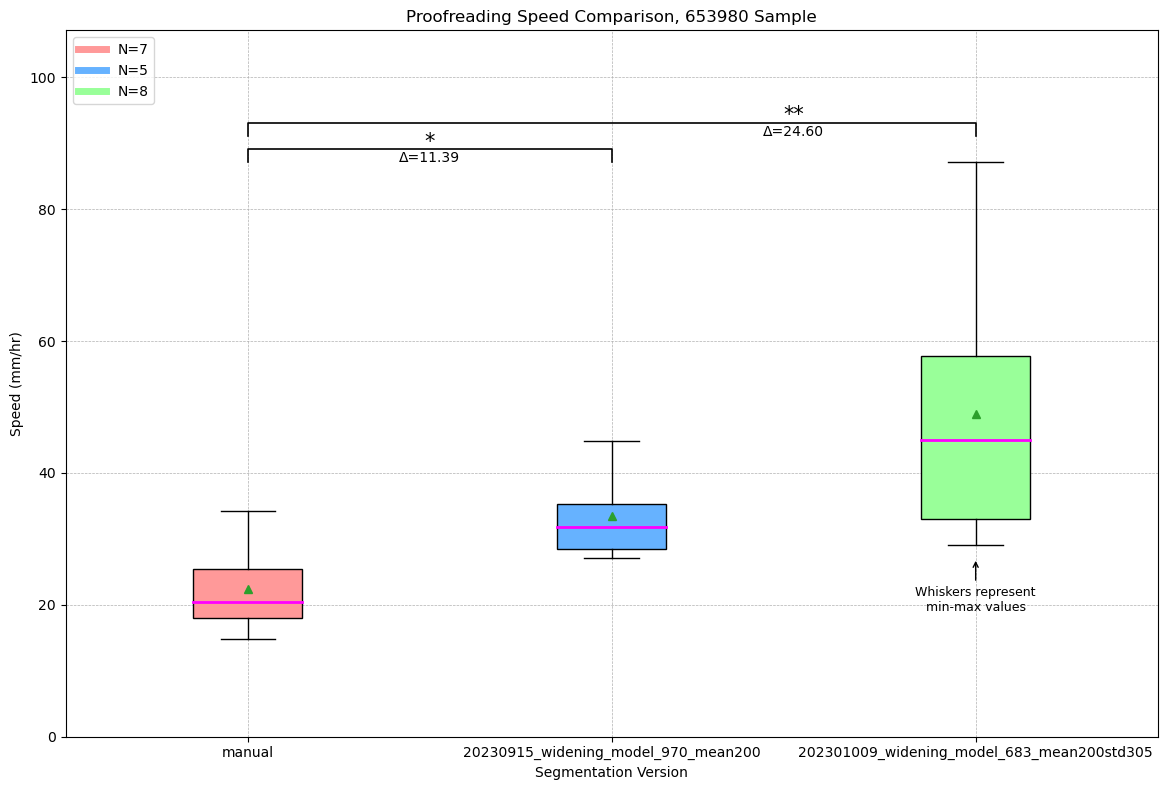

In [6]:
data = get_data()
pairwise_results = pairwise_mannwhitneyu(data)
print(pairwise_results)
create_boxplot(data, pairwise_results)